#  OBJECTIVE #

1.   <b>APPLYING DECISION TREE WITH AVG_WORD_2_VEC VECTORIZATION<font color=RebeccaPurple>

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
   <i><u>
  <font> #


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [6]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [8]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_train[0])
print("*****************************************************************")
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=5,size=50,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
***********************************************************************
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'd

In [9]:
len(w_t_c_words)

11428

In [10]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TRAIN DATA#################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|██████████| 80000/80000 [01:37<00:00, 819.42it/s]

80000
50


In [11]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_sent_vectors)
print(x_train_data.shape)

(80000, 50)


In [12]:
list_of_sent=[]
for sent in x_test:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_test[0])
print("*****************************************************************")
print(list_of_sent[0])
print('*******************************************************************')


hard find item dont buy mani either came stale got way quick classic nonetheless
*****************************************************************
['hard', 'find', 'item', 'dont', 'buy', 'mani', 'either', 'came', 'stale', 'got', 'way', 'quick', 'classic', 'nonetheless']
*******************************************************************


In [13]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TEST DATA#################################################################
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 20000/20000 [00:26<00:00, 745.48it/s]

20000
50


In [14]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_test_data=StandardScaler( with_mean=False).fit_transform(sent_vectors)
print(x_test_data.shape)

(20000, 50)


In [0]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
from sklearn.tree import DecisionTreeClassifier




In [16]:
#biudling the model

dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[5,7,10,15,50],'min_samples_split':[5,25,50,100,500]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(dt, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [17]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data


CPU times: user 5.3 s, sys: 178 ms, total: 5.48 s
Wall time: 7min 7s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [5, 7, 10, 15, 50], 'min_samples_split': [5, 25, 50, 100, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [18]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [19]:
print(model.score(x_test_data,y_test))#checking the score on test_Data 

0.9348750304638631


In [20]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.002659,0.007253,0.940868,0.948264,5,5,"{'max_depth': 5, 'min_samples_split': 5}",4,0.945117,0.950201,...,0.939255,0.947501,0.940360,0.947511,0.939053,0.946232,0.991049,0.000568,0.002205,0.001525
1,1.976443,0.006667,0.940868,0.948244,5,25,"{'max_depth': 5, 'min_samples_split': 25}",3,0.945033,0.950201,...,0.939255,0.947488,0.940445,0.947511,0.939053,0.946232,1.004463,0.000183,0.002169,0.001508
2,1.983162,0.006709,0.940883,0.948218,5,50,"{'max_depth': 5, 'min_samples_split': 50}",2,0.945175,0.950069,...,0.939255,0.947488,0.940445,0.947511,0.938982,0.946232,0.999571,0.000093,0.002235,0.001475
3,1.977678,0.006696,0.940776,0.947942,5,100,"{'max_depth': 5, 'min_samples_split': 100}",5,0.944807,0.949252,...,0.939255,0.947488,0.940274,0.947285,0.938982,0.946232,1.002806,0.000037,0.002101,0.001229
4,1.976446,0.006760,0.941019,0.946464,5,500,"{'max_depth': 5, 'min_samples_split': 500}",1,0.945803,0.946229,...,0.939952,0.947068,0.939927,0.946487,0.938880,0.945696,1.010875,0.000165,0.002451,0.000480
5,2.653299,0.007029,0.936799,0.954525,7,5,"{'max_depth': 7, 'min_samples_split': 5}",8,0.934812,0.958227,...,0.940162,0.953647,0.938298,0.953777,0.935917,0.951179,1.342417,0.000030,0.002110,0.002360
6,2.650946,0.007054,0.936483,0.954193,7,25,"{'max_depth': 7, 'min_samples_split': 25}",9,0.934500,0.957729,...,0.940114,0.953476,0.938265,0.953595,0.935526,0.950992,1.356034,0.000155,0.002338,0.002217
7,2.643516,0.007065,0.937085,0.953450,7,50,"{'max_depth': 7, 'min_samples_split': 50}",7,0.936839,0.955830,...,0.940182,0.952820,0.938387,0.953321,0.936769,0.950766,1.346490,0.000127,0.002289,0.001698
8,2.640853,0.007006,0.936414,0.952404,7,100,"{'max_depth': 7, 'min_samples_split': 100}",10,0.935249,0.954358,...,0.938895,0.951909,0.937161,0.952229,0.936585,0.950264,1.348897,0.000123,0.001618,0.001372
9,2.597897,0.006915,0.937176,0.947477,7,500,"{'max_depth': 7, 'min_samples_split': 500}",6,0.940271,0.947757,...,0.939841,0.947387,0.934645,0.948131,0.937068,0.946492,1.339024,0.000104,0.002563,0.000549


In [0]:
results['mean_train_score']=results['mean_train_score']*100
results['mean_test_score']=results['mean_test_score']*100

In [0]:
results=results.round(decimals=2)

In [0]:
results['mean_test_score']=100-results['mean_test_score']

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_min_samples_split','mean_test_score'	)

In [29]:
test_score_heatmap

param_min_samples_split,5,25,50,100,500
param_max_depth,,,,,
5,5.91,5.91,5.91,5.92,5.90
7,6.32,6.35,6.29,6.36,6.28
10,7.00,7.11,6.94,7.00,6.48
15,8.09,8.10,7.77,7.52,6.61
50,9.50,9.01,8.39,7.95,6.69


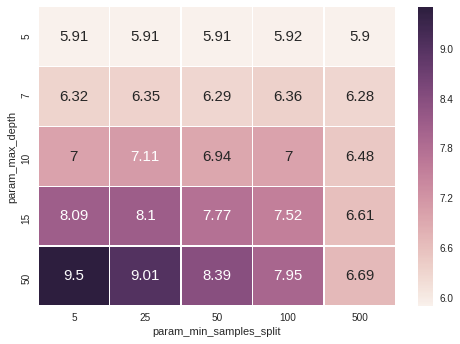

In [30]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [31]:
print(model.best_estimator_)#printing the best_estimator

DecisionTreeClassifier(class_weight={1: 0.5, 0: 0.5}, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=5 AND MIN_SAMPLE_SPLIT=500

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

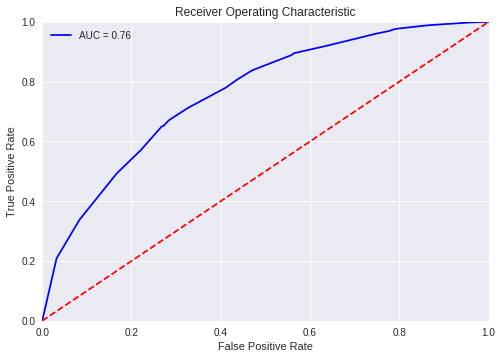

In [32]:
probs = model.predict_proba(x_test_data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
print("AUC SCORE FROM THE PLOT IS FOUND AS ",roc_auc*100)

AUC SCORE FROM THE PLOT IS FOUND AS  76.0695896321256


# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 87.975%
Precision on test set: 0.886
Recall on test set: 0.989
F1-Score on test set: 0.935
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



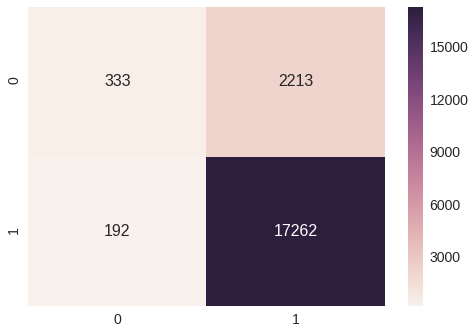

In [38]:
#Testing Accuracy on Test data  
dt=DecisionTreeClassifier(criterion='gini', splitter='best',class_weight={1:.5,0:.5},min_samples_split=500,max_depth=5)
dt.fit(x_train_data,y_train)#fitting the model
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
y_pred = dt.predict(x_test_data) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# AVG WORD_2_ VECTORIZATION FOR DECISION TREE IS COMPLETED 

In [0]:
#avg word_2_vertorization is completed for decision_trees